# `matplotlib` text alignment in matplotlib

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [2]:
# And system font so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

## Plot

In [3]:
# grid layout
mosaic = """
    ..Z..
    ABCDE
    .FGHI
"""

# vertical and horizontal alignment options
va_vals = ['bottom', 'baseline', 'center', 'center_baseline', 'top']
ha_vals = ['left', 'center', 'right']

text_col = "#2ec27e"

# matplotlib settings
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 18,
    }
)

In [4]:
[*va_vals, *ha_vals]

['bottom',
 'baseline',
 'center',
 'center_baseline',
 'top',
 'left',
 'center',
 'right']

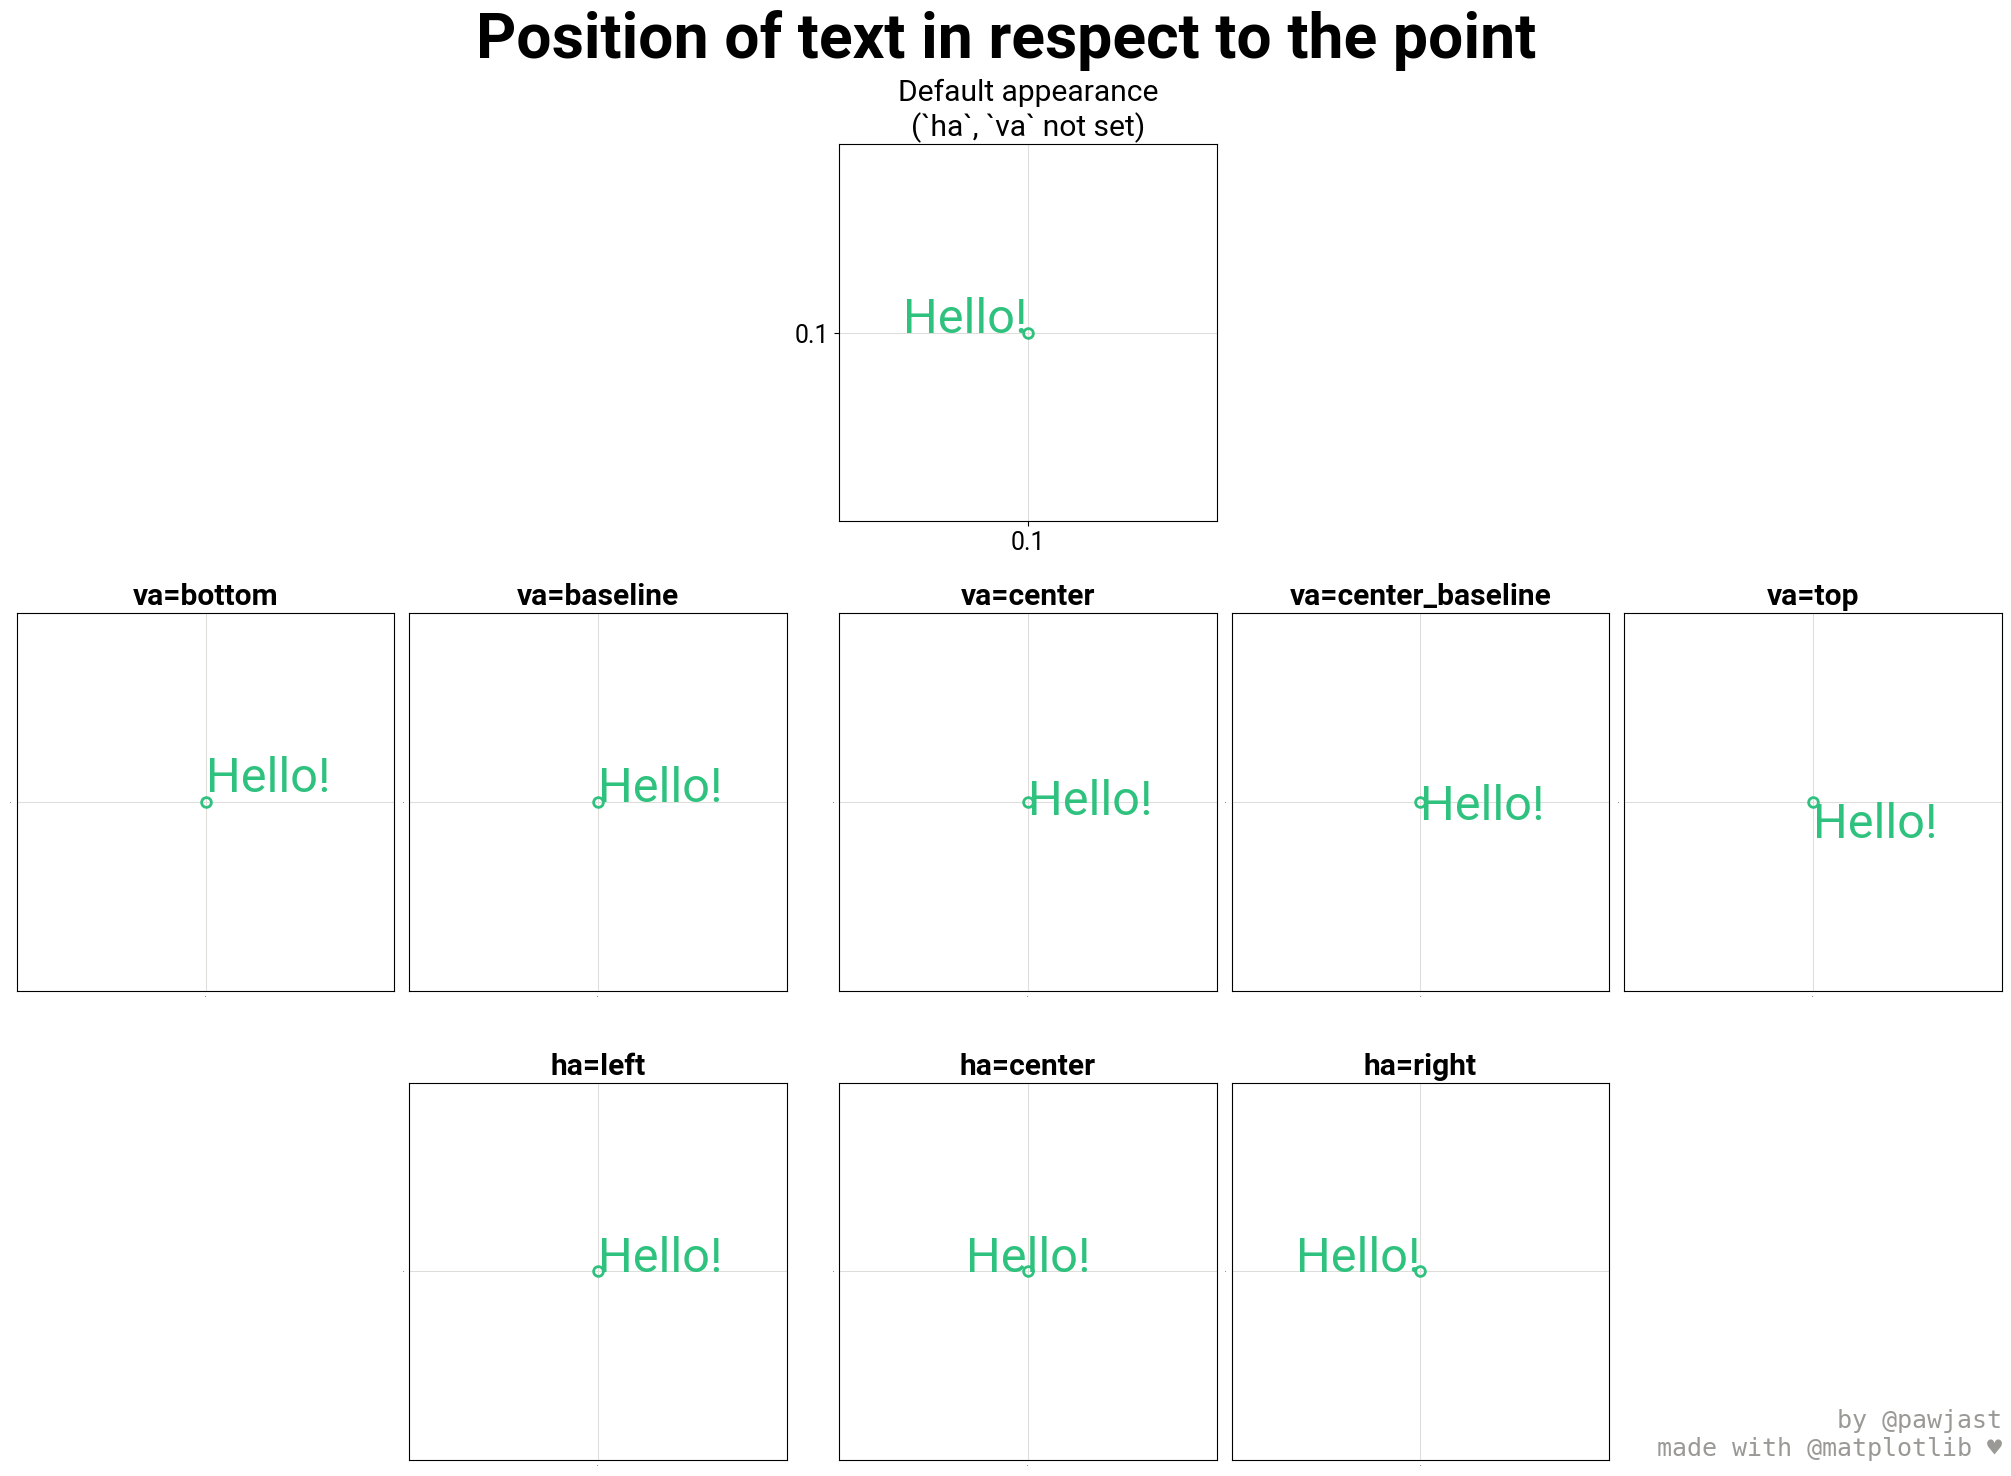

In [5]:
fig, ax = plt.subplot_mosaic(
    figsize=(20,15),
    facecolor="white",
    mosaic=mosaic,
    layout="constrained",
    subplot_kw={
        "aspect": "equal"
    }
)
fig.suptitle(
    "Position of text in respect to the point",
    fontsize=45,
    weight="bold"
)


for a, val in zip(list(ax.keys())[1:-1], [*va_vals, *ha_vals]):
    if a in list("ABCDE"):
        ax[a].set_title(
            f"va={val}",
            weight="bold"
        )
        param={
            "va": val
        }
    else:
        ax[a].set_title(
            f"ha={val}",
            weight="bold"
        )
        param={
            "ha": val
        }

    # plot a point
    ax[a].plot(
        0.1, 0.1,
        'o',
        markeredgecolor=text_col,
        markeredgewidth=2,
        markerfacecolor=(1, 1, 1, 0),
        markersize=7
    )
    # add a text
    ax[a].text(
        x=0.1, y=0.1,
        s="Hello!",
        color=text_col,
        fontsize=35,
        **param
    )

    ax[a].set_xlim(0, 0.2)
    ax[a].set_ylim(0, 0.2)
    ax[a].grid(
        lw=0.75,
        color="#deddda"
    )
    ax[a].set_xticks([0.1])
    ax[a].set_yticks([0.1])
    ax[a].tick_params(
        axis="both",
        length=0,
        labelsize=0
    )

# Default settings
ax["Z"].set_title(f"Default appearance\n(`ha`, `va` not set)")
# plot a point
ax["Z"].plot(
    0.1, 0.1,
    'o',
    markeredgecolor=text_col,
    markeredgewidth=2,
    markerfacecolor=(1, 1, 1, 0),
    markersize=7
)
# add a text
ax["Z"].text(
    x=0.1, y=0.1,
    s="Hello!",
    color=text_col,
    fontsize=35,
    **param
)

ax["Z"].set_xlim(0, 0.2)
ax["Z"].set_ylim(0, 0.2)
ax["Z"].grid(
    lw=0.75,
    color="#deddda"
)

ax["Z"].set_xticks([0.1])
ax["Z"].set_xticklabels(["0.1"])
ax["Z"].set_yticks([0.1])
ax["Z"].set_yticklabels(["0.1"])

# Footer
ax["I"].axis("off")
ax["I"].text(
    1, 0,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax["I"].transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=18,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="pawjast.png",
#     format="png",
#     dpi=125
# );